In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews= pd.read_csv('reviews_filtered.csv')

In [4]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw
1,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw
2,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw
3,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw
4,qx6WhZ42eDKmBchZDax4dQ,0,2017-03-27 01:14:37,0,Amo5gZBvCuPc_tZNpHwtsA,5,"Our family LOVES the food here. Quick, friendl...",1,DzZ7piLBF-WsJxqosfJgtA


In [13]:
reviews.loc[0, 'text']

'I\'ll be the first to admit that I was not excited about going to La Tavolta. Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.  Im also not big on ordering pasta when I go out. Alas, I was outnumbered. Thank goodness! I ordered the sea bass special. It was to die for. Cooked perfectly, seasoned perfectly, perfect portion. I can not say enough good things about this dish. When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?" She does. \n\nMy hubby got the crab tortellini and also loved his. I heard "mmmm this is so good" from all around the table. Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant. Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversation so it didn\'t seem to bother any

In [15]:
reviews.loc[1, 'text']

"Wow. So surprised at the one and two star reviews!  We started with the most tender calamari. Although the marinara sauce was a bit bland, but a touch of salt made it just right. My husband had the veal with peppers and said it was so delicious and tender. The mashed potatoes were perfect. I had the salmon Diablo which was also delicious. Our salad was beautiful! Dressing was served on the salad and it was a nice amount. We ended our delicious meal with a piece of tiramisu. Our server Matt was right on!! Very pleasant and knowledgeable about the menu. Our appetizer, salad and entrees were timed perfectly. I love salad and did not mind that my entree was served while I was still eating it! No problem it let my dinner cool to just the right temp for me to eat it comfortably. \nI wonder sometimes if people just don't appreciate relaxing and taking time to eat a wonderful and beautifully prepared meal.  A wonderful atmosphere. So relaxing. The chairs are super comfortable too!!! We will c

In [23]:
reviews.describe()

,cool,funny,stars,useful
count,594862.000000,594862.000000,594862.000000,594862.000000
mean,0.530718,0.482976,3.718837,1.139669
std,2.318556,4.660295,1.403135,5.645876
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,1.000000
max,506.000000,1290.000000,5.000000,1241.000000


In [24]:
star_counts = reviews['stars'].value_counts()

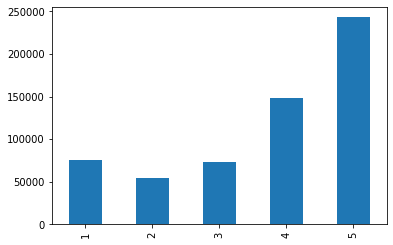

In [27]:
star_counts.sort_index().plot(kind='bar')

In [28]:
good_review_text = reviews.loc[reviews['stars'] == 5, 'text']
bad_review_text = reviews.loc[reviews['stars'] < 4, 'text']

In [31]:
good_review_text.shape

(243057,)

In [32]:
bad_review_text.shape

(203707,)

In [33]:
good_review_text = good_review_text.iloc[:1000].str.lower()
bad_review_text = bad_review_text.iloc[:1000].str.lower()

In [34]:
good_review_text.head()

2     you can't really find anything wrong with this...
4     our family loves the food here. quick, friendl...
6     their pettuccine was fresh-made in the morning...
9     this place epitomizes the rumored transformati...
14    this place is quite possibly my favorite resta...
Name: text, dtype: object

In [35]:
bad_review_text.head()

3     good selection of classes of beers and mains. ...
7     came here on a thursday night at 6:30 p.m. my ...
8     went here last weekend and was pretty disappoi...
11    th service here is very hit or miss... sometim...
12    i took my wife out for a birthday dinner with ...
Name: text, dtype: object

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [40]:
good_text = ' '.join(review for review in good_review_text)
bad_text = ' '.join(review for review in bad_review_text)

In [41]:
good_wordcloud = WordCloud(max_words=50).generate(good_text)

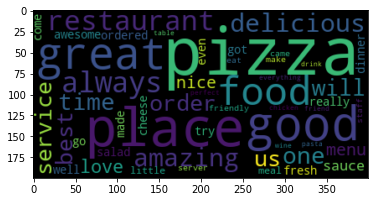

In [44]:
plt.imshow(good_wordcloud, interpolation='bilinear')

In [45]:
good_wordcloud.to_file('./top_review_words.png')

In [46]:
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)

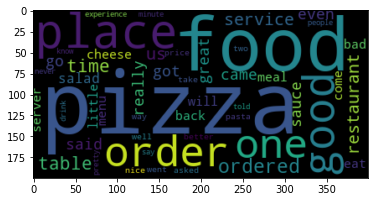

In [47]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

In [48]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [49]:
stopwords = set(STOPWORDS)
stopwords.update(bad_stopwords)

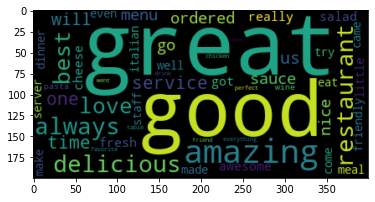

In [50]:
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)
plt.imshow(better_wordcloud, interpolation='bilinear')